In [8]:
import re 
import pdfplumber

import csv

DATE_STRING = '2020-06-10'

outfile = 'covid_active_workplaces_0610.csv'
outfileh = open(outfile, 'w')
writer = csv.writer(outfileh)

writer.writerow(['workplace','address1', 'county', 'start', 'end', 'cases', 'report_date'])

file = "../or_weekly_reports/COVID-19-Weekly-Report-%s-FINAL.pdf" % DATE_STRING
pdf = pdfplumber.open(file)


In [9]:
settings = {
    "vertical_strategy": "lines", 
    "horizontal_strategy": "words",
    "snap_tolerance": 3,
    "join_tolerance": 3,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 1,
    "keep_blank_chars": False,
    "text_tolerance": 3,
    "text_x_tolerance": None,
    "text_y_tolerance": None,
    "intersection_tolerance": 3,
    "intersection_x_tolerance": None,
    "intersection_y_tolerance": None,
}


In [10]:


pagenumber = 9

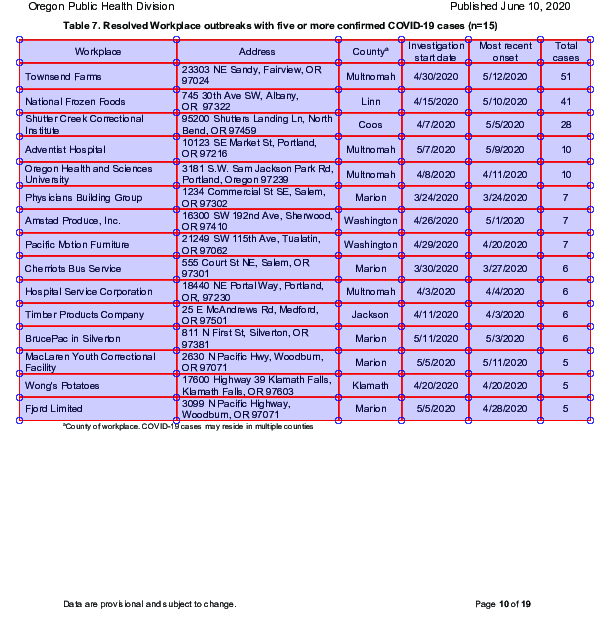

In [11]:
#im = pdf.pages[pagenumber].to_image()
width = pdf.pages[pagenumber].width
height = pdf.pages[pagenumber].height
box1 = (0, 150,  width, height)

cropped_page = pdf.pages[pagenumber].crop(box1) 
im = cropped_page.to_image()
im.debug_tablefinder()

In [12]:
table_found = cropped_page.extract_table(table_settings={})
result_count = len(table_found)
# Skip the header row
for i in range(1,result_count):
    this_row = table_found[i]

    if not this_row[0]:
        # hack for misread 
        print("Empty-ish row, continuing")
        continue
    print(len(this_row))
    assert len(this_row)==6
    print(this_row)
    this_row.append(DATE_STRING)
    writer.writerow(this_row)
    

6
['Townsend Farms', '23303 NE Sandy, Fairview, OR \n97024', 'Multnomah', '4/30/2020', '5/12/2020', '51']
6
['National Frozen Foods', '745 30th Ave SW, Albany, \nOR  97322', 'Linn', '4/15/2020', '5/10/2020', '41']
6
['Shutter Creek Correctional \nInstitute', '95200 Shutters Landing Ln, North \nBend, OR 97459', 'Coos', '4/7/2020', '5/5/2020', '28']
6
['Adventist Hospital', '10123 SE Market St, Portland, \nOR 97216', 'Multnomah', '5/7/2020', '5/9/2020', '10']
6
['Oregon Health and Sciences \nUniversity', '3181 S.W. Sam Jackson Park Rd, \nPortland, Oregon 97239', 'Multnomah', '4/8/2020', '4/11/2020', '10']
6
['Physicians Building Group', '1234 Commercial St SE, Salem, \nOR 97302', 'Marion', '3/24/2020', '3/24/2020', '7']
6
['Amstad Produce, Inc.', '16300 SW 192nd Ave, Sherwood, \nOR 97410', 'Washington', '4/26/2020', '5/1/2020', '7']
6
['Pacific Motion Furniture', '21249 SW 115th Ave, Tualatin, \nOR 97062', 'Washington', '4/29/2020', '4/20/2020', '7']
6
['Cherriots Bus Service', '555 Cour

In [13]:
## that's the end! In other reports there might be more. 

In [14]:
outfileh.close()
